In [1]:
import numpy as np 
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Scaling
from sklearn.preprocessing import StandardScaler

#Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
# Reading the data
student = pd.read_csv('xAPI-Edu-Data.csv') 
type(student)

pandas.core.frame.DataFrame

In [10]:
json1=student.to_json() 
(json1)

list

In [6]:
student.head(100)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,100,80,2,70,No,Bad,Under-7,H
96,F,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Father,14,60,11,75,Yes,Good,Under-7,H
97,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,6,2,38,12,No,Bad,Under-7,M
98,F,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Father,10,3,0,30,No,Bad,Under-7,M


In [7]:
# Show null counts and data types
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    564 non-null    object
 1   NationalITy               564 non-null    object
 2   PlaceofBirth              564 non-null    object
 3   StageID                   564 non-null    object
 4   GradeID                   564 non-null    object
 5   SectionID                 564 non-null    object
 6   Topic                     564 non-null    object
 7   Semester                  564 non-null    object
 8   Relation                  564 non-null    object
 9   raisedhands               564 non-null    int64 
 10  VisITedResources          564 non-null    int64 
 11  AnnouncementsView         564 non-null    int64 
 12  Discussion                564 non-null    int64 
 13  ParentAnsweringSurvey     564 non-null    object
 14  ParentschoolSatisfaction  

## Exploring the data

c:\users\shwetanksingh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

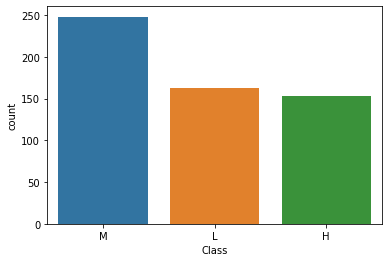

In [8]:
# Count of students of each class
sns.countplot(student['Class'])

<AxesSubplot:xlabel='Class', ylabel='count'>

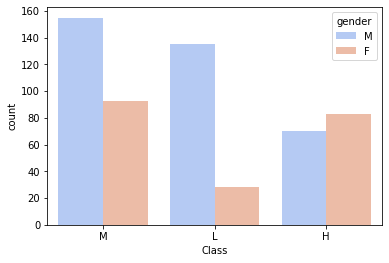

In [9]:
# Student class by gender
sns.countplot(x='Class',hue='gender',data=student,palette='coolwarm')

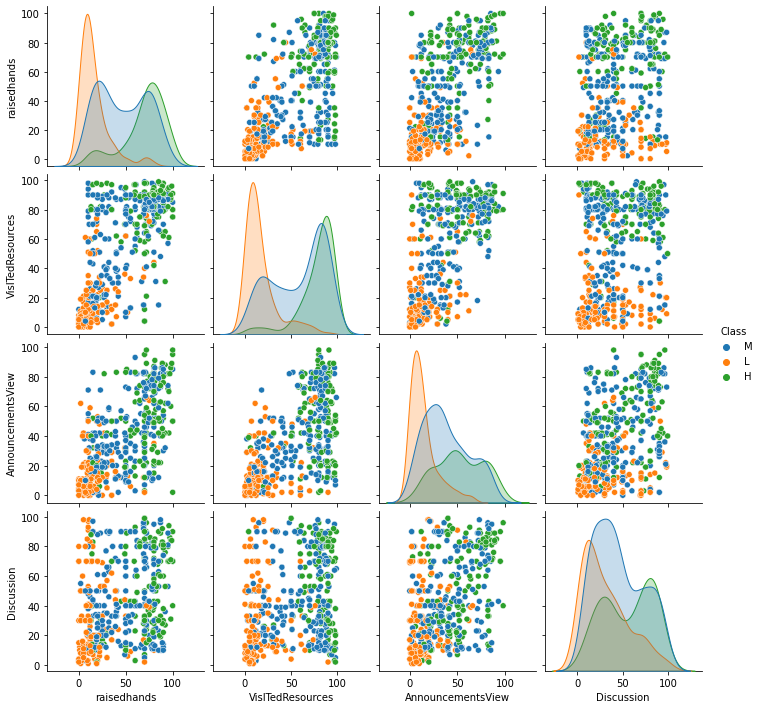

In [10]:
# Countplot based on the student Class
sns.pairplot(student,hue='Class')

## Feature Engineering

In [11]:
# Replacing categorical values to numerical

student['gender'].replace('M', 0,inplace=True)
student['gender'].replace('F', 1,inplace=True)

# Or we can use get_dummies to convert categorical values and concatenate them later
nat = pd.get_dummies(student['NationalITy'])
sid = pd.get_dummies(student['StageID'])
gid = pd.get_dummies(student['GradeID'])
secid = pd.get_dummies(student['SectionID'])
topic = pd.get_dummies(student['Topic'])
semester = pd.get_dummies(student['Semester'])
rel = pd.get_dummies(student['Relation'])
pas = pd.get_dummies(student['ParentAnsweringSurvey'])
pss = pd.get_dummies(student['ParentschoolSatisfaction'])
sab = pd.get_dummies(student['StudentAbsenceDays'])

In [12]:
#Drop useless columns & columns we need to replace with variables above
student.drop(['NationalITy','PlaceofBirth','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester',
              'Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays'],axis=1,inplace=True)

In [13]:
# Concatenating the variables we created above 
student = pd.concat([student,nat,sid,gid,secid,topic,semester,rel,pas,pss,sab],axis=1)

In [14]:
student.head()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Egypt,IND,Iran,Iraq,...,F,S,Father,Mum,No,Yes,Bad,Good,Above-7,Under-7
0,0,15,16,2,20,M,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,0,20,20,3,25,M,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,0,10,7,0,30,L,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,0,30,25,5,35,L,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,0,40,50,12,50,M,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


## Feature selection

In [15]:
# Check all the columns
student.columns

Index(['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion', 'Class', 'Egypt', 'IND', 'Iran', 'Iraq', 'Jordan', 'KW',
       'Lybia', 'Morocco', 'Palestine', 'SaudiArabia', 'Syria', 'Tunis', 'USA',
       'lebanon', 'venzuela', 'HighSchool', 'MiddleSchool', 'lowerlevel',
       'G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11',
       'G-12', 'A', 'B', 'C', 'Arabic', 'Biology', 'Chemistry', 'English',
       'French', 'Geology', 'History', 'IT', 'Math', 'Quran', 'Science',
       'Spanish', 'F', 'S', 'Father', 'Mum', 'No', 'Yes', 'Bad', 'Good',
       'Above-7', 'Under-7'],
      dtype='object')

In [16]:
Label = student['Class'] # Class is the value we want to predict

Features = student[['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion','Father', 'Mum', 'No', 'Yes', 'Bad', 'Good',
       'Above-7', 'Under-7']]


# We can also use the following method

#Features = student.drop(['feature a','feature b' .... 'feature n'],axis=1)

In [17]:
Features.iloc[:1,:]

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,Father,Mum,No,Yes,Bad,Good,Above-7,Under-7
0,0,15,16,2,20,1,0,0,1,0,1,0,1


## Scaling the data

In [18]:
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

# Train Test Split

In [19]:
X = scaled
y = Label
# split the data to 20% test,80% train with random state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Training Models

## Random Forest Classifier
### Finding best number of estimators

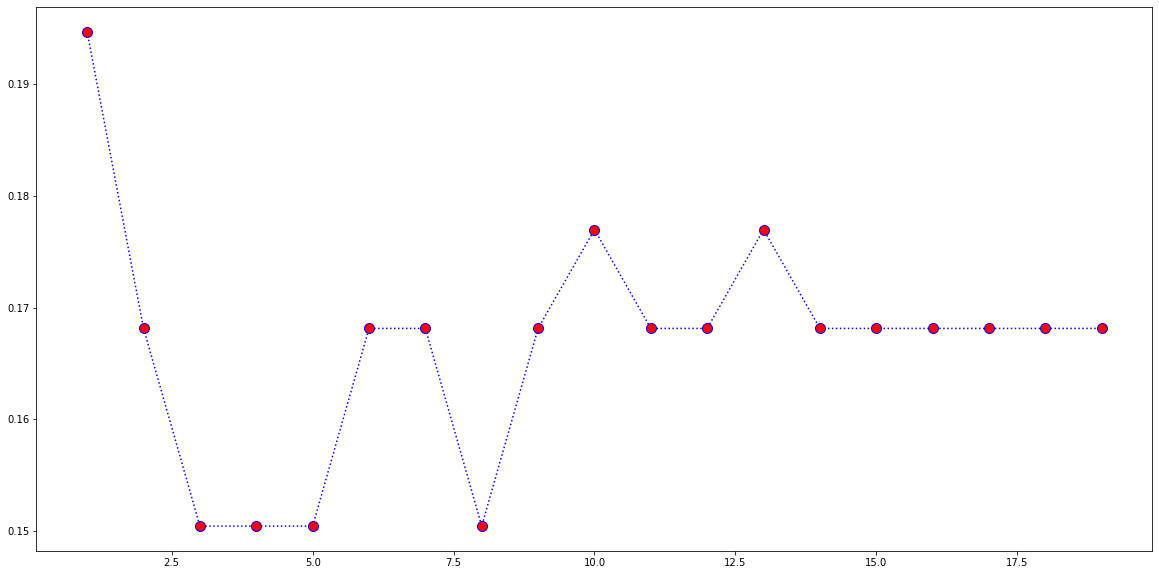

In [20]:
err = [] # Array to save all error rates

for i in range(1,20): # Loop to try all error rates from 1 to 40
    rfe = RandomForestClassifier(n_estimators=i*10,random_state=42) # Create rfc with number of estimators with value i*10
    rfe.fit(X_train,y_train) # Fit the model
    errpred = rfe.predict(X_test) # Predict the value
    err.append(np.mean(errpred != y_test)) #Add the value to the array
    
    
# Plotting the value of estimators error rate using the method we created above to make it easier to choose an estimator value
plt.figure(figsize=(20,10)) # Size of the figure
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=10)#plotting the values
plt.title = 'Number of estimators VS Error Rates' #title
plt.xlabel = 'Estimators' #X label
plt.ylabel= 'Error Rate' # Y label
plt.show()

### Training the model

In [21]:
rfc = RandomForestClassifier(n_estimators=80,max_features='auto', max_depth=9,min_samples_leaf=1,
                             min_samples_split=2,bootstrap=True, random_state = 42)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

Random Forest Classifier

              precision    recall  f1-score   support

           H       0.73      0.71      0.72        31
           L       0.97      0.94      0.96        34
           M       0.78      0.81      0.80        48

    accuracy                           0.82       113
   macro avg       0.83      0.82      0.82       113
weighted avg       0.82      0.82      0.82       113



Confusion matrix


<AxesSubplot:>

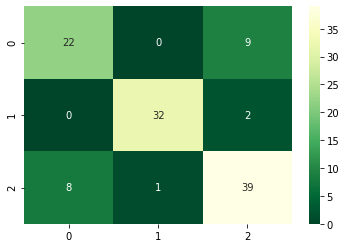

In [22]:
print('Random Forest Classifier' + '\n')
print(classification_report(y_test,rfcpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,rfcpred),cmap='YlGn_r',annot=True,fmt='g')

## Support Vector Classifier

In [23]:
svc = SVC(C=100,random_state=42,gamma=1)
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)

Support Vector Classifier

              precision    recall  f1-score   support

           H       0.81      0.68      0.74        31
           L       0.94      0.85      0.89        34
           M       0.73      0.85      0.79        48

    accuracy                           0.81       113
   macro avg       0.83      0.79      0.81       113
weighted avg       0.81      0.81      0.81       113



Confusion matrix


<AxesSubplot:>

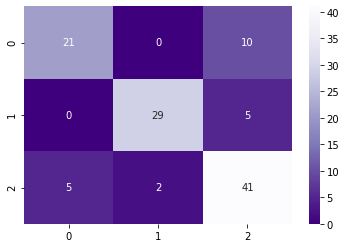

In [24]:
print('Support Vector Classifier' + '\n')
print(classification_report(y_test,svcpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,svcpred),cmap='Purples_r',annot=True,fmt='g')

## Desicion Tree Classifier

In [25]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_split=4, min_samples_leaf=1, random_state=1)
dt.fit(X_train,y_train)
dtpred = dt.predict(X_test)

Desicion Tree Classifier

              precision    recall  f1-score   support

           H       0.88      0.68      0.76        31
           L       0.88      0.88      0.88        34
           M       0.75      0.85      0.80        48

    accuracy                           0.81       113
   macro avg       0.83      0.80      0.81       113
weighted avg       0.82      0.81      0.81       113



Confusion matrix


<AxesSubplot:>

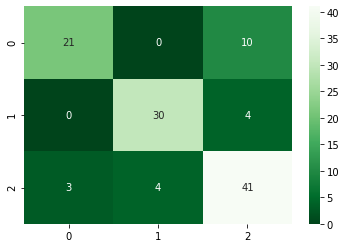

In [26]:
print('Desicion Tree Classifier' + '\n')
print(classification_report(y_test,dtpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,dtpred),cmap='Greens_r',annot=True,fmt='g')

## KNN classifier
### Choosing K value

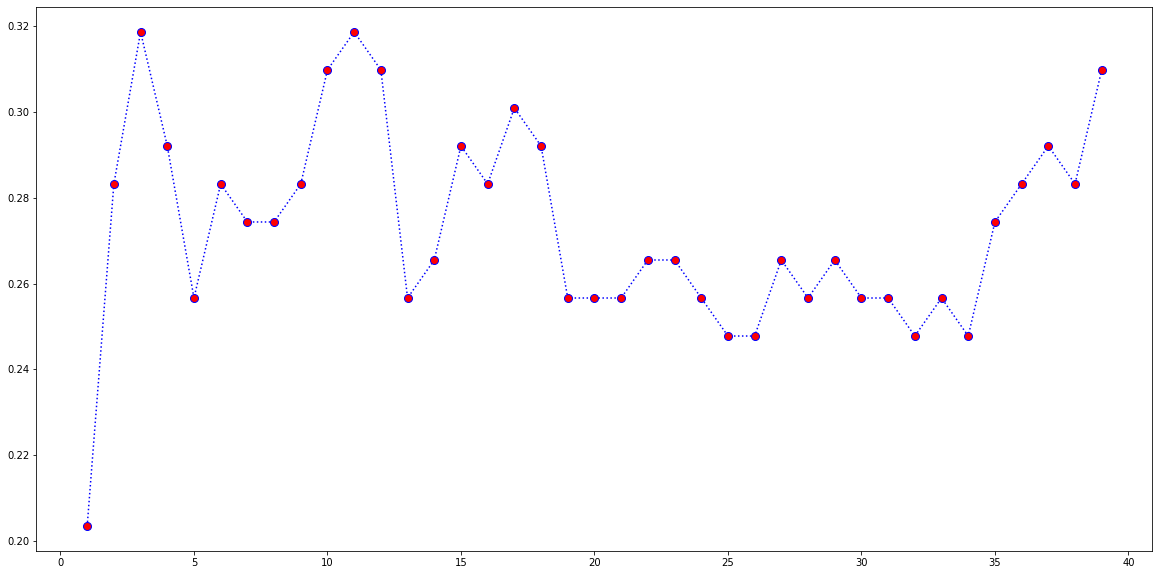

In [27]:
err_rate = [] # Array to save all error rates

for i in range(1,40): # loop to try all error rates from 1 to 40
    knn = KNeighborsClassifier(n_neighbors=i) # create a knn object with number of neighbours with value i
    knn.fit(X_train,y_train) # fit the model
    pred_i = knn.predict(X_test) # predict the value
    err_rate.append(np.mean(pred_i != y_test)) #add the value to the array
    
    # Plotting the value of k error rate using the method we created above to make it easier to choose a k value
plt.figure(figsize=(20,10)) # size of the figure
plt.plot(range(1,40),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)#plotting the values
plt.title = 'K Values VS Error Rates' #title
plt.xlabel = 'K Value' #x label
plt.ylabel= 'Error Rate' # y label
plt.show()

## Training the model

In [28]:
# We didn't choose 1 as it's so sensetive to just rely on 1 neighbor
knn = KNeighborsClassifier(n_neighbors=21,p=10)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)

K Nearest Neighbours

              precision    recall  f1-score   support

           H       0.65      0.65      0.65        31
           L       0.86      0.88      0.87        34
           M       0.68      0.67      0.67        48

    accuracy                           0.73       113
   macro avg       0.73      0.73      0.73       113
weighted avg       0.72      0.73      0.72       113



Confusion matrix


<AxesSubplot:>

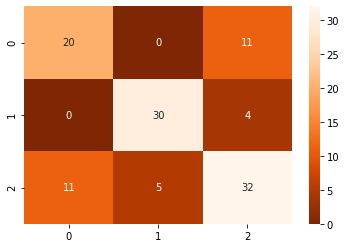

In [29]:
print('K Nearest Neighbours' + '\n')
print(classification_report(y_test,knnpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,knnpred),cmap='Oranges_r',annot=True,fmt='g')

## Logistic Regression

In [30]:
Lr = LogisticRegression(C=1,max_iter=30,multi_class='auto',random_state=1)
Lr.fit(X_train,y_train)
Lrpred = Lr.predict(X_test)

c:\users\shwetanksingh\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression

              precision    recall  f1-score   support

           H       0.70      0.61      0.66        31
           L       0.84      0.91      0.87        34
           M       0.69      0.71      0.70        48

    accuracy                           0.74       113
   macro avg       0.75      0.74      0.74       113
weighted avg       0.74      0.74      0.74       113



Confusion matrix


<AxesSubplot:>

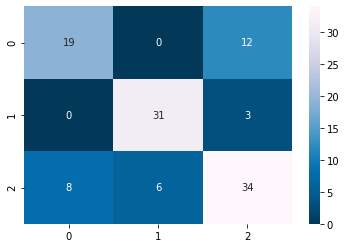

In [31]:
print('Logistic Regression' + '\n')
print(classification_report(y_test,Lrpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,Lrpred),cmap='PuBu_r',annot=True,fmt='g')

# Features importance

<AxesSubplot:title={'center':'Feature Importance dependency on Model Performance'}>

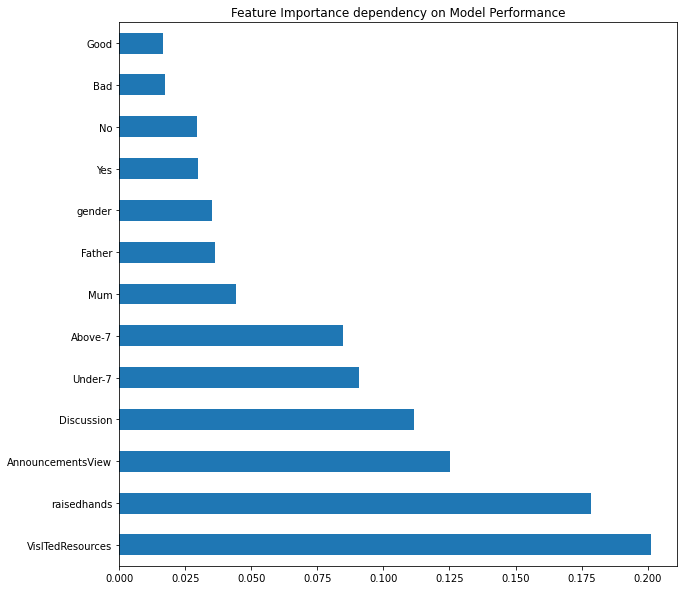

In [32]:
# Show which features has the most effect on our results so we can modify and tune our features
# I used Random Forest Classifier to determine the feature importances

plt.figure(figsize=(10,10))
importance = pd.Series(rfc.feature_importances_,index=Features.columns)
importance.nlargest(15).plot(kind='barh',title='Feature Importance dependency on Model Performance')

## Prediction with best Model 

In [33]:
k=rfc.predict([[0,80,10,1,8,0,0,0,0,0,0,0,0]])
def test(value):
    if value=='l':
        return 'Student performance is low'
    elif value=='M':
        return 'Student performance is Medium'
    else:
        return 'Student performance is High'
test(k)

'Student performance is High'

In [ ]:
rfc = RandomForestClassifier(n_estimators=80,max_features='auto', max_depth=9,min_samples_leaf=1,
                             min_samples_split=2,bootstrap=True, random_state = 42)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)